### Credit card Risk Analyis using(K-NN Model, Decision tree, Linear Regressions)

#### 1. Importing some usefull library to anlysis and predict risk

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

#### 2. Collect data 

In [46]:
data = pd.read_csv('./Datasets/credit_risk.csv')
data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


#### 3. Exploratory Data Analysis

In [4]:
# from all data only top 10 data are display
data.head(10) 

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
6,6,26,77100,RENT,8.0,EDUCATION,35000,12.42,1,0.45,N,3
7,7,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4
8,8,24,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3


In [5]:
#from all data only show last five data
data.tail(5)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [9]:
#Let's checks total data in data sets total data including index 0 (0-32580)
data['Id'].count()

32581

In [18]:
# Let's checking datatypes of all data 
data.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [24]:
#overall info of data sets including datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [13]:
#let's checks the effiency of all data tables
data.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [15]:
#let's view the correlations of datasets 
data.corr()
#data have perfect correlations

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
Id,1.000000,0.734248,0.170488,0.186934,0.100978,0.001918,-0.060256,-0.069398,0.772918
Age,0.734248,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
Income,0.170488,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
Emp_length,0.186934,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
Amount,0.100978,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
Rate,0.001918,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
Status,-0.060256,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
Percent_income,-0.069398,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
Cred_length,0.772918,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [17]:
#checking shape of the data sets (there are 32581 rows and 12 columns in data table)
data.shape

(32581, 12)

In [23]:
#dividing status of credit card data having non-risk and risk (0 represents non risk and 1 represents risk)
data.Status.value_counts() 

0    25473
1     7108
Name: Status, dtype: int64

In [25]:
#checking total columns of dataset
pdata.columns

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

### 4. Data Cleaning

In [61]:
#At here data cleaning or data agrumentation process is going to perform

data = data.drop_duplicates()

In [62]:
data.isnull().sum()

Id                    0
Age                   0
Income                0
Home                  0
Emp_length          895
Intent                0
Amount                0
Rate               3116
Status                0
Percent_income        0
Default               0
Cred_length           0
Percent_inccome       0
dtype: int64

**Let's check number of zero value in the data sets**

In [64]:
print('The number of 0 value in column Emp_length:', data[data['Emp_length']==0].shape[0])
print('The number of 0 value in column Rate:', data[data['Rate']==0].shape[0])
print('The number of 0 value in column Percent_income:', data[data['Percent_income']==0].shape[0])

The number of 0 value in column Emp_length: 0
The number of 0 value in column Rate: 0
The number of 0 value in column Percent_income: 0


**Replacing zero value with its repective mean value & some where meadian**

In [65]:
data['Emp_length']=data['Emp_length'].replace(0,data['Emp_length'].mean())#normal distribution
print('The number of 0 value in column Emp_length:', data[data['Emp_length']==0].shape[0])

data['Percent_income']=data['Percent_income'].replace(0,data['Percent_income'].median())#skiewed distribution
print('The number of 0 value in column Percent_income:', data[data['Percent_income']==0].shape[0])

The number of 0 value in column Emp_length: 0
The number of 0 value in column Percent_income: 0


In [67]:
data.describe() 

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Percent_inccome
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,5.410202,9589.371106,11.011695,0.218164,0.170245,5.804211,0.170245
std,9405.479594,6.348078,6.198312e+04,3.715395,6322.086646,3.240459,0.413006,0.106745,4.055001,0.106745
min,0.000000,20.000000,4.000000e+03,1.000000,500.000000,5.420000,0.000000,0.010000,2.000000,0.010000
25%,8145.000000,23.000000,3.850000e+04,3.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.090000
50%,16290.000000,26.000000,5.500000e+04,4.789686,8000.000000,10.990000,0.000000,0.150000,4.000000,0.150000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000,0.230000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,0.830000


### 5. Data visualizations

### 1. Count Plot

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


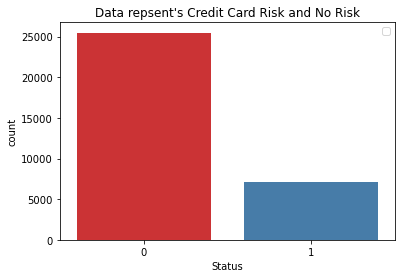

In [84]:
sns.countplot('Status', data= data, palette='Set1')
plt.title("Data repsent's Credit Card Risk and No Risk")
plt.legend()

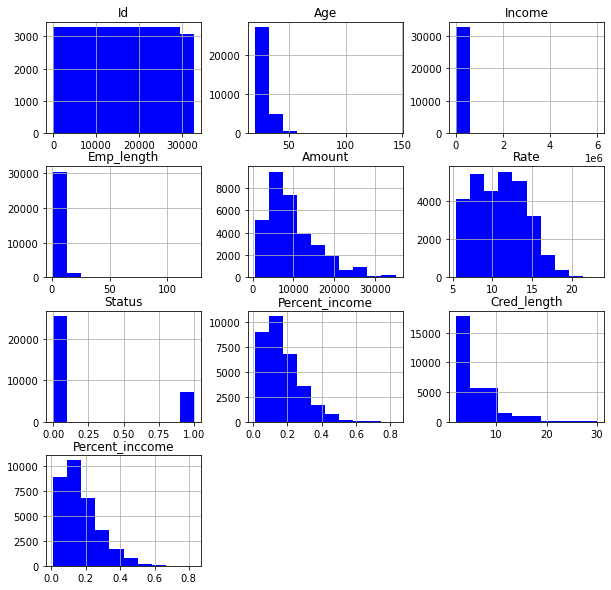

In [92]:
data.hist(bins=10,figsize=(10,10), color='blue')
plt.show()